In [1]:
# reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

In [2]:
from matplotlib.pylab import rcParams
from matplotlib.ticker import FormatStrFormatter
rcParams['figure.figsize'] = 12, 7.5
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import e

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
labels = pd.read_csv('survey_data/scale_labels.csv')

In [5]:
labels

,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,ERQ10,RPS,BPAQSF,ADHDRS,NPI16,RFQ_m,RFQ_v,RFQ,LOC13,BPSSR,BRCS,CAMSR,CEI,BRS,ZBS,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
0,flourshing,openness,conscientiousness,neuroticism,extraversion,agreeableness,procrastination,emotion_regulation_cognitive_reappraisal,emotion_regulation_expressive_suppression,emotion_regulation,risk_propensity,agression,adhd,narcissism,regulatory_focus_promotion,regulatory_focus_prevention,regulatory_focus,locus_of_control,boredom_proneness,resilience_coping,mindfulness,curiosity,resilience,boredom_susceptibility,self-monitoring_ability,self_monitoring_sensitivity,self_monitoring,guilt_proneness,cognitive_autonomy,sleep_problems,religiosity,honesty_humility,need_for_cognition,internet


In [6]:
labels['BRCS']

0    resilience_coping
Name: BRCS, dtype: object

In [7]:
data = pd.read_csv('survey_data/results_compilation.csv')
data = data.dropna(how='any')

In [8]:
data.head()

,ResponseId,TargetId,QualtricsId,IPAddress,Latitude,Longitude,StartDate_1,EndDate_1,StartDate_2,EndDate_2,StartDate_3,EndDate_3,Complete,ID,SurveyType,Relationship,Age,Gender,Religion,Duration_1,Duration_2,Duration_3,DurationTotal,guess_1,guess_2,guess_3,FS,BFI_O,BFI_C,BFI_N,BFI_E,BFI_A,PCS9,ERQ10_c,ERQ10_e,ERQ10,RPS,BPAQSF,ADHDRS,NPI16,RFQ_m,RFQ_v,RFQ,LOC13,BPSSR_I,BPSSR_I5,BPSSR_E,BPSSR_Amb,BPSSR,BRCS,CAMSR,CEI,BRS,ZBS,SMS_ams,SMS_seb,SMS,GP5,SOAS,ESS,CR,HEXACO60,NCS6,SAS
1,2,2,R_1MPUDZpgLwIxe1A,175.223.22.95,37.598495,126.978302,3/18/20 11:17,3/18/20 11:25,3/18/20 11:26,3/18/20 11:29,2020/03/18 11:29,2020/03/18 11:32,True,aeri,2,1.0,3.0,M,7.0,501.0,226.0,168.0,895.0,28.0,24.0,18.0,40.0,12.0,12.0,8.0,11.0,9.0,27.0,23.0,8.0,31.0,36.0,25.0,37.0,7.0,18.0,18.0,33.0,8.0,9.0,9.0,11.0,9.0,26.0,13.0,35.0,33.0,18.0,28.0,22.0,17.0,39.0,15.0,60.0,18.0,11.0,27.0,18.0,37.0
2,3,2,R_29nM2ZnVIpXduHk,183.104.122.33,35.268005,128.839813,3/18/20 10:29,3/18/20 10:42,3/18/20 10:42,3/18/20 11:17,2020/03/18 11:17,2020/03/18 11:24,True,aeri,2,1.0,3.0,M,7.0,792.0,2088.0,395.0,3275.0,31.0,34.0,26.0,50.0,12.0,15.0,4.0,10.0,11.0,19.0,34.0,21.0,55.0,27.0,14.0,20.0,8.0,26.0,25.2,47.0,10.0,3.0,3.6,4.0,4.5,10.0,17.0,40.0,41.0,24.0,18.0,21.0,22.0,43.0,19.0,48.0,15.0,17.0,29.0,25.0,22.0
4,5,2,R_27NBh3oSecWIT6D,211.224.126.112,35.872299,128.592407,3/18/20 10:19,3/18/20 10:35,3/18/20 10:36,3/18/20 10:46,2020/03/18 10:47,2020/03/18 10:52,True,aeri,2,1.0,2.0,F,7.0,961.0,642.0,300.0,1903.0,40.0,60.0,30.0,48.0,10.0,12.0,7.0,10.0,12.0,33.0,25.0,17.0,42.0,42.0,24.0,38.0,3.0,20.0,26.4,42.0,12.0,5.0,5.4,9.0,6.0,18.0,14.0,36.0,36.0,21.0,21.0,20.0,18.0,38.0,18.0,49.0,20.0,19.0,34.0,19.0,34.0
11,12,8,R_svqo3ChxV53yEzn,218.51.203.41,37.519806,126.911285,3/17/20 16:11,3/17/20 16:25,2020/03/17 16:25,2020/03/17 16:36,2020/03/17 16:37,2020/03/17 16:41,True,Journey Yoon,2,2.0,2.0,M,7.0,813.0,632.0,264.0,1709.0,6.0,6.0,46.0,44.0,11.0,15.0,10.0,5.0,11.0,24.0,41.0,19.0,60.0,19.0,14.0,22.0,2.0,21.0,20.4,38.0,10.0,12.0,10.8,9.0,9.0,27.0,17.0,25.0,44.0,13.0,21.0,24.0,14.0,38.0,25.0,50.0,9.0,28.0,30.0,28.0,19.0
14,15,10,R_2QEu7fjDSuE1f39,211.244.151.77,37.576096,126.934387,3/17/20 23:59,3/18/20 0:22,2020/03/18 0:23,2020/03/18 0:44,2020/03/18 0:44,2020/03/18 0:54,True,llama,2,3.0,3.0,F,3.0,1382.0,1252.0,550.0,3184.0,15.0,10.0,10.0,39.0,6.0,10.0,13.0,8.0,12.0,28.0,34.0,12.0,46.0,38.0,27.0,33.0,3.0,21.0,19.2,37.0,10.0,8.0,7.8,9.0,7.5,22.0,15.0,34.0,33.0,14.0,11.0,21.0,20.0,41.0,16.0,46.0,8.0,15.0,27.0,22.0,27.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 89
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ResponseId     30 non-null     int64  
 1   TargetId       30 non-null     int64  
 2   QualtricsId    30 non-null     object 
 3   IPAddress      30 non-null     object 
 4   Latitude       30 non-null     float64
 5   Longitude      30 non-null     float64
 6   StartDate_1    30 non-null     object 
 7   EndDate_1      30 non-null     object 
 8   StartDate_2    30 non-null     object 
 9   EndDate_2      30 non-null     object 
 10  StartDate_3    30 non-null     object 
 11  EndDate_3      30 non-null     object 
 12  Complete       30 non-null     bool   
 13  ID             30 non-null     object 
 14  SurveyType     30 non-null     int64  
 15  Relationship   30 non-null     float64
 16  Age            30 non-null     float64
 17  Gender         30 non-null     object 
 18  Religion    

In [10]:
X = data.iloc[:,26:64].drop(['ADHDRS'], axis=1)
# X = data.iloc[:,26:63].drop(['RFQ', 'RFQ_m', 'RFQ_v'], axis=1)
# X = data.iloc[:,26:63].drop(['BFI_O'], axis=1)
# X = data.iloc[:,26:63].drop(['PCS9'], axis=1)
# X = data.iloc[:,26:63].drop(['FS'], axis=1)
# X = data.iloc[:,26:63].drop(['HEXACO60'], axis=1)
# X = data.iloc[:,26:63].drop(['BFI_O'], axis=1)
X = X.drop(['RFQ', 'RFQ_m', 'RFQ_v', 'BPSSR_I', 'BPSSR_I5', 'BPSSR_E', 'BPSSR_Amb', "ERQ10_e", "ERQ10_c", "SMS"], axis=1)
x = X.to_numpy() # np array

In [11]:
y = data['ADHDRS']
# y = data['BPSSR']
# y = data['RFQ_m']
# y = data['BFI_O']
# y = data['PCS9']
# y = data['FS']
# y = data['HEXACO60']
# y = data['BFI_O']

In [12]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [13]:
alphas = 10**np.linspace(3,-3,100)*0.5

In [14]:
ridge = Ridge(fit_intercept=True, normalize=True)
coefs = []
errors = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    coefs.append(pd.Series(ridge.coef_, index = X.columns))
    errors.append(mean_squared_error(y_test, pred))

Text(0.5, 1.0, 'Ridge')

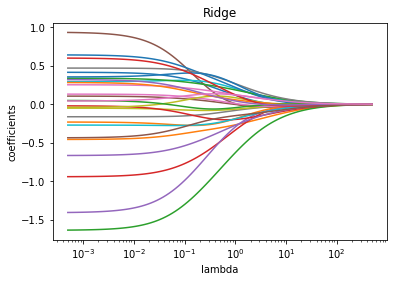

In [15]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Ridge')

Text(0.5, 1.0, 'Ridge')

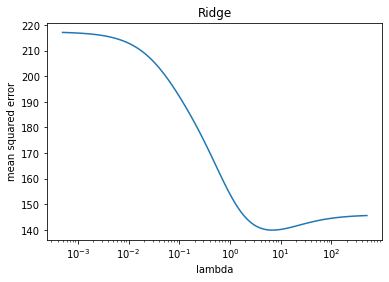

In [16]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('mean squared error')
plt.title('Ridge')

In [17]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', fit_intercept=True, normalize=True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

ridge_fit = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_fit.fit(x_train, y_train)
mean_squared_error(y_test, ridge_fit.predict(x_test))

ridge_fit.fit(x, y)
pd.Series(ridge_fit.coef_, index = X.columns)

FS         -0.003537
BFI_O      -0.012571
BFI_C      -0.246137
BFI_N      -0.009145
BFI_E       0.302806
BFI_A       0.079287
PCS9        0.082348
ERQ10      -0.036783
RPS         0.032476
BPAQSF      0.102873
NPI16       0.196553
LOC13       0.011494
BPSSR       0.053455
BRCS       -0.006576
CAMSR      -0.122947
CEI        -0.025605
BRS         0.020775
ZBS         0.173196
SMS_ams    -0.071433
SMS_seb    -0.051559
GP5         0.043011
SOAS       -0.004541
ESS         0.028426
CR         -0.089621
HEXACO60   -0.068830
NCS6       -0.021087
SAS         0.120508
dtype: float64

In [18]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', fit_intercept=True, store_cv_values = True, normalize=True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

3.2896661232878412

In [19]:
ridge_fit = Ridge(alpha = ridgecv.alpha_, normalize=True)
ridge_fit.fit(x_train, y_train)
mean_squared_error(y_test, ridge_fit.predict(x_test))

141.44289955609548

In [20]:
ridge_fit.fit(x, y)
pd.Series(ridge_fit.coef_, index = X.columns)

FS         -0.003537
BFI_O      -0.012571
BFI_C      -0.246137
BFI_N      -0.009145
BFI_E       0.302806
BFI_A       0.079287
PCS9        0.082348
ERQ10      -0.036783
RPS         0.032476
BPAQSF      0.102873
NPI16       0.196553
LOC13       0.011494
BPSSR       0.053455
BRCS       -0.006576
CAMSR      -0.122947
CEI        -0.025605
BRS         0.020775
ZBS         0.173196
SMS_ams    -0.071433
SMS_seb    -0.051559
GP5         0.043011
SOAS       -0.004541
ESS         0.028426
CR         -0.089621
HEXACO60   -0.068830
NCS6       -0.021087
SAS         0.120508
dtype: float64

In [21]:
print(labels['BFI_C'][0])
print(labels['BFI_E'][0])
print(labels['NPI16'][0])
print(labels['CAMSR'][0])
print(labels['ZBS'][0])

conscientiousness
extraversion
narcissism
mindfulness
boredom_susceptibility


Text(0.5, 1.0, 'Ridge CV')

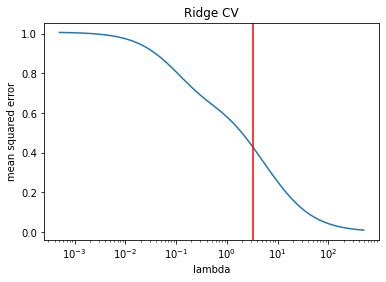

In [22]:
ax = plt.gca()
ax.plot(alphas, ridgecv.cv_values_.mean(axis=0))
ax.set_xscale('log')
ax.axvline(x=ridgecv.alpha_, color='r')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('mean squared error')
plt.title('Ridge CV')

In [23]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)

Text(0.5, 1.0, 'Lasso')

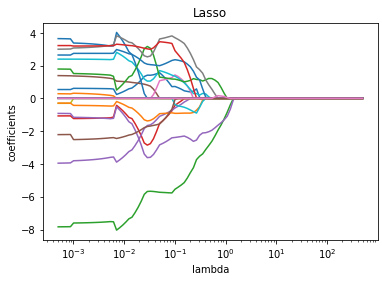

In [24]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Lasso')

In [28]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)
lassocv.alpha_

0.6697555285257556

In [29]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
mean_squared_error(y_test, lasso.predict(x_test))

135.54336063535254

In [26]:
pd.Series(lasso.coef_, index=X.columns)

FS          0.000000
BFI_O      -0.000000
BFI_C      -0.801979
BFI_N      -0.000000
BFI_E      -0.000000
BFI_A      -0.000000
PCS9        0.000000
ERQ10      -0.000000
RPS        -0.000000
BPAQSF      0.000000
NPI16       0.000000
LOC13      -0.000000
BPSSR       0.225726
BRCS       -0.000000
CAMSR      -0.341588
CEI        -0.000000
BRS        -0.000000
ZBS         0.018827
SMS_ams     0.000000
SMS_seb    -0.000000
GP5         0.000000
SOAS        0.000000
ESS        -0.000000
CR         -0.000000
HEXACO60   -0.000000
NCS6       -0.000000
SAS         0.017789
dtype: float64

In [27]:
print(labels['BFI_C'][0])
print(labels['BPSSR'][0])
print(labels['CAMSR'][0])
print(labels['ZBS'][0])

conscientiousness
boredom_proneness
mindfulness
boredom_susceptibility
